In [54]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from keras.utils import image_dataset_from_directory


In [ ]:
from keras.applications import mobilenet_v2
moblilenet = mobilenet_v2.MobileNetV2(input_shape= (224,224,3),include_top = False,weights = 'imagenet')

In [ ]:
for layer in moblilenet.layers:
 moblilenet.trainable = False

In [ ]:
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [ ]:
!kaggle datasets download -d anshulmehtakaggl/chess-pieces-detection-images-dataset

 58% 2.00M/3.47M [00:00<00:00, 2.95MB/s]
100% 3.47M/3.47M [00:00<00:00, 4.03MB/s]


In [ ]:
import zipfile
with zipfile.ZipFile('chess-pieces-detection-images-dataset.zip','r') as zip_ref:
  zip_ref.extractall('chess_pieces')

In [ ]:
path = '/content/chess_pieces'

In [ ]:
test_dataset=tf.keras.preprocessing.image_dataset_from_directory(path,validation_split=0.2,
                                                               image_size=(224,224),
                                                               batch_size=32,
                                                               subset="validation",seed = 123)

Found 651 files belonging to 5 classes.
Using 130 files for validation.


In [ ]:
train_dataset=tf.keras.preprocessing.image_dataset_from_directory(path,validation_split=0.2,
                                                               image_size=(224,224),
                                                               batch_size=32,
                                                               subset="training",
                                                               seed=123)


Found 651 files belonging to 5 classes.
Using 521 files for training.


In [ ]:
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.experimental.preprocessing.RandomFlip("horizontal"),
    tf.keras.layers.experimental.preprocessing.RandomRotation(0.1),
    tf.keras.layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
from keras.layers import Conv2D,MaxPool2D,Dropout,Dense,Flatten,MaxPooling2D
from tensorflow.keras.layers.experimental.preprocessing import Rescaling


In [ ]:
model = keras.models.Sequential()
model.add(Rescaling(1./255 ,input_shape=(224,224,3)))
model.add(data_augmentation)
model.add(moblilenet)
model.add(Flatten())
model.add(Dense(128 , activation = 'relu'))
model.add(Dense(5,activation= 'softmax'))

In [ ]:
model.compile(optimizer= 'adam',loss = keras.losses.SparseCategoricalCrossentropy(),metrics = 'accuracy')

In [ ]:
hist = model.fit(train_dataset,validation_data= test_dataset,epochs = 10)

Epoch 1/10
17/17 [==============================] - 30s 2s/step - loss: 10.7319 - accuracy: 0.4107 - val_loss: 1.7640 - val_accuracy: 0.5385
Epoch 2/10
17/17 [==============================] - 25s 1s/step - loss: 0.9035 - accuracy: 0.7428 - val_loss: 0.8047 - val_accuracy: 0.7385
Epoch 3/10
17/17 [==============================] - 26s 2s/step - loss: 0.5464 - accuracy: 0.8349 - val_loss: 0.9648 - val_accuracy: 0.7615
Epoch 4/10
17/17 [==============================] - 27s 2s/step - loss: 0.3519 - accuracy: 0.8944 - val_loss: 0.8438 - val_accuracy: 0.7769
Epoch 5/10
17/17 [==============================] - 25s 1s/step - loss: 0.3480 - accuracy: 0.8829 - val_loss: 0.8946 - val_accuracy: 0.7462
Epoch 6/10
17/17 [==============================] - 25s 1s/step - loss: 0.1924 - accuracy: 0.9347 - val_loss: 0.6342 - val_accuracy: 0.8231
Epoch 7/10
17/17 [==============================] - 25s 1s/step - loss: 0.2117 - accuracy: 0.9367 - val_loss: 0.7637 - val_accuracy: 0.8385
Epoch 8/10
17/17 [=

In [ ]:
df = pd.DataFrame(hist.history)
df.head()

,loss,accuracy,val_loss,val_accuracy
0,10.731876,0.410749,1.764027,0.538462
1,0.903457,0.742802,0.804696,0.738462
2,0.546406,0.834933,0.964815,0.761538
3,0.351850,0.894434,0.843798,0.776923
4,0.347966,0.882917,0.894647,0.746154


Text(0.5, 1.0, 'Accuracy')

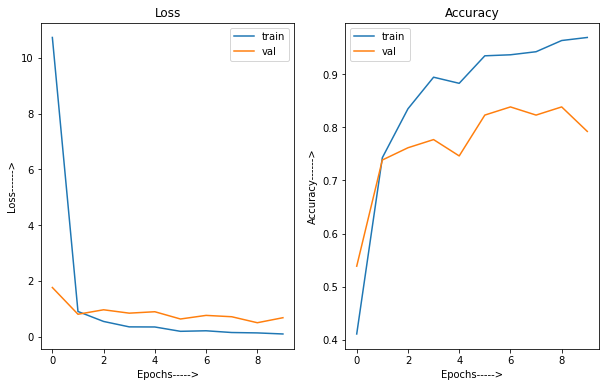

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(df[['loss','val_loss']])
plt.xlabel("Epochs----->")
plt.ylabel("Loss------>")
plt.legend(['train','val'])
plt.title("Loss")
plt.subplot(1,2,2)
plt.plot(df[['accuracy','val_accuracy']])
plt.xlabel("Epochs----->")
plt.ylabel("Accuracy------>")
plt.legend(['train','val'])
plt.title("Accuracy")

In [58]:
train_data_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2,rotation_range=5,width_shift_range=0.2,height_shift_range=0.2,horizontal_flip = True,vertical_flip=True,fill_mode='nearest')

validation_data_generator = ImageDataGenerator(rescale= 1./255,validation_split=0.2)

In [60]:
training_dataset = train_data_generator.flow_from_directory(directory=path,target_size = (224,224),class_mode='categorical',subset='training',batch_size=32)

Found 523 images belonging to 5 classes.


In [62]:
validation_dataset = validation_data_generator.flow_from_directory(directory=path,target_size = (224,224),class_mode='categorical',subset='validation',batch_size=32)

Found 128 images belonging to 5 classes.


In [67]:
from keras.applications import inception_resnet_v2

inc = inception_resnet_v2.InceptionResNetV2(include_top= False,input_shape=(224,224,3),weights='imagenet')

219055592/219055592 [==============================] - 8s 0us/step


In [68]:
for layer in inc.layers:
 inc.trainable = False

In [75]:
x = Flatten()(inc.output)
pred= Dense(5,activation='softmax')(x)
model = keras.models.Model(inputs= inc.input,outputs = pred)

In [70]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d (Conv2D)                (None, 111, 111, 32  864         ['input_3[0][0]']                
                                )                                                                 
                                                                                                  
 batch_normalization (BatchNorm  (None, 111, 111, 32  96         ['conv2d[0][0]']                 
 alization)                     )                                                             

In [76]:
model.compile(optimizer= 'adam',loss = 'binary_crossentropy',metrics = 'accuracy')

In [77]:
hist = model.fit(training_dataset,validation_data= validation_dataset,epochs = 10)

Epoch 1/10
17/17 [==============================] - 187s 10s/step - loss: 1.8370 - accuracy: 0.3901 - val_loss: 0.5209 - val_accuracy: 0.7266
Epoch 2/10
17/17 [==============================] - 158s 9s/step - loss: 0.6962 - accuracy: 0.5602 - val_loss: 0.8276 - val_accuracy: 0.6172
Epoch 3/10
17/17 [==============================] - 158s 9s/step - loss: 0.6027 - accuracy: 0.6424 - val_loss: 0.3154 - val_accuracy: 0.8203
Epoch 4/10
17/17 [==============================] - 161s 10s/step - loss: 0.5900 - accuracy: 0.6769 - val_loss: 0.3186 - val_accuracy: 0.8203
Epoch 5/10
17/17 [==============================] - 159s 9s/step - loss: 0.5676 - accuracy: 0.6864 - val_loss: 0.3040 - val_accuracy: 0.8516
Epoch 6/10
17/17 [==============================] - 160s 9s/step - loss: 0.5170 - accuracy: 0.7113 - val_loss: 0.3857 - val_accuracy: 0.8125
Epoch 7/10
17/17 [==============================] - 181s 10s/step - loss: 0.4720 - accuracy: 0.7361 - val_loss: 0.2514 - val_accuracy: 0.8750
Epoch 8/10

In [79]:
df = pd.DataFrame(hist.history)

Text(0.5, 1.0, 'Accuracy')

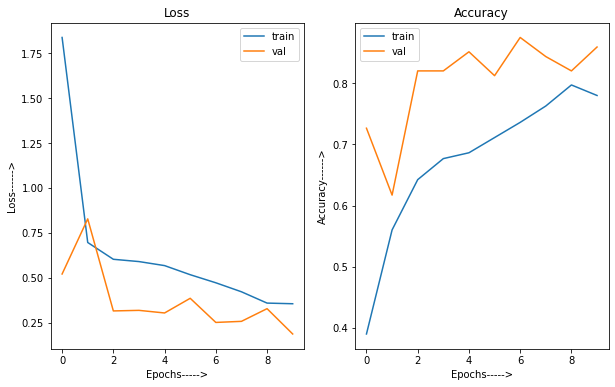

In [80]:

plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.plot(df[['loss','val_loss']])
plt.xlabel("Epochs----->")
plt.ylabel("Loss------>")
plt.legend(['train','val'])
plt.title("Loss")
plt.subplot(1,2,2)
plt.plot(df[['accuracy','val_accuracy']])
plt.xlabel("Epochs----->")
plt.ylabel("Accuracy------>")
plt.legend(['train','val'])
plt.title("Accuracy")